# 📊 Numpy Data Viewer - Trình Xem Dữ Liệu Numpy

Notebook này hiển thị và phân tích các file numpy (.npy) và pickle (.pkl) trong project Image Similarity Search.

## 🎯 Mục tiêu:
- Kiểm tra thông tin cơ bản của các file numpy
- Hiển thị thống kê chi tiết về dữ liệu
- Phân tích cấu trúc và nội dung các database đặc trưng
- Cung cấp giao diện tương tác để khám phá dữ liệu

## 📁 Các file sẽ được phân tích:
- `db_combined.npy` - Database tổng hợp tất cả đặc trưng
- `db_color.npy` - Database đặc trưng màu sắc (HSV histogram)
- `db_shape.npy` - Database đặc trưng hình dạng (Hu moments)
- `db_fourier.npy` - Database đặc trưng Fourier descriptors
- `db_grid.npy` - Database đặc trưng lưới (Grid code)
- `db_edge.npy` - Database đặc trưng cạnh (Edge histogram)
- `paths_db.pkl` - Danh sách đường dẫn ảnh
- `indices.pkl` - Chỉ số phân chia đặc trưng
- `scaler.pkl` - Bộ chuẩn hóa dữ liệu

## 1. Import Thư Viện Cần Thiết

Nhập các thư viện cần thiết để xử lý và hiển thị dữ liệu numpy.

In [1]:
import numpy as np
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.filterwarnings('ignore')

# Cài đặt hiển thị
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Đã import thành công tất cả thư viện cần thiết!")
print(f"📊 Numpy version: {np.__version__}")
print(f"🐼 Pandas version: {pd.__version__}")
print(f"📈 Matplotlib version: {plt.matplotlib.__version__}")

✅ Đã import thành công tất cả thư viện cần thiết!
📊 Numpy version: 2.1.2
🐼 Pandas version: 2.2.3
📈 Matplotlib version: 3.10.1


## 2. Định Nghĩa Danh Sách File Numpy và Pickle

Tạo danh sách các file cần kiểm tra và phân tích.

In [2]:
# Danh sách các file numpy cần phân tích
numpy_files = [
    'db_combined.npy',   # Database tổng hợp (802 features)
    'db_color.npy',      # Database màu sắc (512 features)
    'db_shape.npy',      # Database hình dạng (8 features)
    'db_fourier.npy',    # Database Fourier (10 features)
    'db_grid.npy',       # Database lưới (256 features)
    'db_edge.npy'        # Database cạnh (16 features)
]

# Danh sách các file pickle
pickle_files = [
    'paths_db.pkl',      # Đường dẫn ảnh
    'indices.pkl',       # Chỉ số phân chia features
    'scaler.pkl'         # Bộ chuẩn hóa MinMaxScaler
]

# Mô tả các loại đặc trưng
feature_descriptions = {
    'db_combined.npy': 'Tổng hợp tất cả đặc trưng đã chuẩn hóa',
    'db_color.npy': 'Histogram màu HSV (8×8×8 = 512 bins)',
    'db_shape.npy': 'Eccentricity + 7 Hu moments',
    'db_fourier.npy': 'Fourier descriptors của contour',
    'db_grid.npy': 'Grid code 16×16 = 256 cells (binary)',
    'db_edge.npy': 'Edge histogram từ 4×4 grid cells'
}

print("📋 DANH SÁCH FILE CẦN PHÂN TÍCH:")
print("=" * 50)
print("\n🔢 Numpy Files:")
for i, file in enumerate(numpy_files, 1):
    status = "✅" if os.path.exists(file) else "❌"
    print(f"{i}. {status} {file}")
    if file in feature_descriptions:
        print(f"   📝 {feature_descriptions[file]}")

print("\n📦 Pickle Files:")
for i, file in enumerate(pickle_files, 1):
    status = "✅" if os.path.exists(file) else "❌"
    print(f"{i}. {status} {file}")

# Kiểm tra tất cả file có tồn tại không
missing_files = [f for f in numpy_files + pickle_files if not os.path.exists(f)]
if missing_files:
    print(f"\n⚠️  Cảnh báo: {len(missing_files)} file không tồn tại: {missing_files}")
else:
    print(f"\n🎉 Tất cả {len(numpy_files + pickle_files)} file đều tồn tại!")

📋 DANH SÁCH FILE CẦN PHÂN TÍCH:

🔢 Numpy Files:
1. ✅ db_combined.npy
   📝 Tổng hợp tất cả đặc trưng đã chuẩn hóa
2. ✅ db_color.npy
   📝 Histogram màu HSV (8×8×8 = 512 bins)
3. ✅ db_shape.npy
   📝 Eccentricity + 7 Hu moments
4. ✅ db_fourier.npy
   📝 Fourier descriptors của contour
5. ✅ db_grid.npy
   📝 Grid code 16×16 = 256 cells (binary)
6. ✅ db_edge.npy
   📝 Edge histogram từ 4×4 grid cells

📦 Pickle Files:
1. ✅ paths_db.pkl
2. ✅ indices.pkl
3. ✅ scaler.pkl

🎉 Tất cả 9 file đều tồn tại!


## 3. Hiển Thị Thông Tin Tổng Quan Các File Numpy

Phân tích và hiển thị thông tin cơ bản về shape, kiểu dữ liệu, và thống kê của từng file numpy.

In [3]:
def analyze_numpy_files():
    """Phân tích và hiển thị thông tin tổng quan các file numpy"""
    
    print("📊 THÔNG TIN CHI TIẾT CÁC FILE NUMPY")
    print("=" * 80)
    
    # DataFrame để lưu thông tin tổng hợp
    summary_data = []
    
    for file_name in numpy_files:
        if os.path.exists(file_name):
            try:
                data = np.load(file_name)
                
                # Thông tin cơ bản
                file_info = {
                    'File': file_name,
                    'Shape': str(data.shape),
                    'Số mẫu': data.shape[0],
                    'Số đặc trưng': data.shape[1] if len(data.shape) > 1 else 1,
                    'Data Type': str(data.dtype),
                    'Memory (MB)': f"{data.nbytes / (1024*1024):.2f}",
                    'Min': f"{data.min():.4f}",
                    'Max': f"{data.max():.4f}",
                    'Mean': f"{data.mean():.4f}",
                    'Std': f"{data.std():.4f}"
                }
                summary_data.append(file_info)
                
                print(f"\n📁 {file_name}")
                print(f"   📏 Shape: {data.shape}")
                print(f"   🔢 Data type: {data.dtype}")
                print(f"   💾 Memory usage: {data.nbytes / (1024*1024):.2f} MB")
                print(f"   📈 Statistics:")
                print(f"      ▫️ Min: {data.min():.6f}")
                print(f"      ▫️ Max: {data.max():.6f}")
                print(f"      ▫️ Mean: {data.mean():.6f}")
                print(f"      ▫️ Std: {data.std():.6f}")
                
                # Hiển thị vài mẫu đầu
                print(f"   🔍 First 3 samples (first 5 features):")
                if len(data.shape) > 1:
                    print(f"      {data[:3, :5]}")
                else:
                    print(f"      {data[:3]}")
                    
            except Exception as e:
                print(f"❌ Lỗi khi đọc {file_name}: {e}")
        else:
            print(f"❌ File {file_name} không tồn tại")
    
    # Tạo bảng tổng hợp
    if summary_data:
        print(f"\n\n📋 BẢNG TỔNG HỢP:")
        print("=" * 80)
        summary_df = pd.DataFrame(summary_data)
        display(summary_df)
        
        return summary_df
    
    return None

# Chạy phân tích
summary_df = analyze_numpy_files()

📊 THÔNG TIN CHI TIẾT CÁC FILE NUMPY

📁 db_combined.npy
   📏 Shape: (200, 802)
   🔢 Data type: float64
   💾 Memory usage: 1.22 MB
   📈 Statistics:
      ▫️ Min: 0.000000
      ▫️ Max: 1.000000
      ▫️ Mean: 0.154938
      ▫️ Std: 0.344744
   🔍 First 3 samples (first 5 features):
      [[0.         0.         0.         0.0091681  0.37413675]
 [0.         0.         0.         0.00927554 0.37852098]
 [0.         0.         0.00180801 0.03945717 0.76036675]]

📁 db_color.npy
   📏 Shape: (200, 512)
   🔢 Data type: float64
   💾 Memory usage: 0.78 MB
   📈 Statistics:
      ▫️ Min: 0.000000
      ▫️ Max: 1.000000
      ▫️ Mean: 0.027347
      ▫️ Std: 0.121457
   🔍 First 3 samples (first 5 features):
      [[0.         0.         0.         0.0091681  0.37413675]
 [0.         0.         0.         0.00927554 0.37852098]
 [0.         0.         0.00180801 0.03945717 0.76036675]]

📁 db_shape.npy
   📏 Shape: (200, 8)
   🔢 Data type: float64
   💾 Memory usage: 0.01 MB
   📈 Statistics:
      ▫️ Min

,File,Shape,Số mẫu,Số đặc trưng,Data Type,Memory (MB),Min,Max,Mean,Std
0,db_combined.npy,"(200, 802)",200,802,float64,1.22,0.0000,1.0000,0.1549,0.3447
1,db_color.npy,"(200, 512)",200,512,float64,0.78,0.0000,1.0000,0.0273,0.1215
2,db_shape.npy,"(200, 8)",200,8,float64,0.01,0.0000,1.0000,0.5299,0.3713
3,db_fourier.npy,"(200, 10)",200,10,float64,0.02,0.0000,1.0000,0.0759,0.1192
4,db_grid.npy,"(200, 256)",200,256,float64,0.39,0.0000,1.0000,0.3813,0.4857
5,db_edge.npy,"(200, 16)",200,16,float64,0.02,0.0000,1.0000,0.4772,0.3369


In [4]:
def analyze_pickle_files():
    """Phân tích và hiển thị thông tin các file pickle"""
    
    print("📦 THÔNG TIN CÁC FILE PICKLE")
    print("=" * 60)
    
    for file_name in pickle_files:
        if os.path.exists(file_name):
            try:
                with open(file_name, 'rb') as f:
                    data = pickle.load(f)
                    
                print(f"\n📁 {file_name}")
                print(f"   🔧 Type: {type(data)}")
                
                if isinstance(data, list):
                    print(f"   📏 Length: {len(data)}")
                    if len(data) > 0:
                        print(f"   🔍 First 5 items:")
                        for i, item in enumerate(data[:5]):
                            print(f"      {i+1}. {item}")
                        if len(data) > 10:
                            print(f"   🔍 Last 3 items:")
                            for i, item in enumerate(data[-3:], len(data)-2):
                                print(f"      {i}. {item}")
                                
                elif isinstance(data, np.ndarray):
                    print(f"   📏 Shape: {data.shape}")
                    print(f"   🔢 Data type: {data.dtype}")
                    print(f"   🔍 Content preview:")
                    print(f"      {data}")
                    
                elif hasattr(data, '__dict__'):
                    print(f"   🔍 Attributes: {list(data.__dict__.keys())}")
                    if hasattr(data, 'feature_range'):
                        print(f"   📊 Feature range: {data.feature_range}")
                    if hasattr(data, 'scale_'):
                        print(f"   📏 Scale shape: {data.scale_.shape}")
                        print(f"   📈 Scale stats: min={data.scale_.min():.6f}, max={data.scale_.max():.6f}")
                else:
                    content_str = str(data)
                    if len(content_str) > 200:
                        content_str = content_str[:200] + "..."
                    print(f"   🔍 Content preview: {content_str}")
                    
            except Exception as e:
                print(f"❌ Lỗi khi đọc {file_name}: {e}")
        else:
            print(f"❌ File {file_name} không tồn tại")

# Chạy phân tích pickle files
analyze_pickle_files()

📦 THÔNG TIN CÁC FILE PICKLE

📁 paths_db.pkl
   🔧 Type: <class 'list'>
   📏 Length: 200
   🔍 First 5 items:
      1. DataLoc2\Apple 10\r0_135_100.jpg
      2. DataLoc2\Apple 10\r0_139_100.jpg
      3. DataLoc2\Apple 10\r0_267_100.jpg
      4. DataLoc2\Apple 10\r1_15_100.jpg
      5. DataLoc2\Apple 10\r1_163_100.jpg
   🔍 Last 3 items:
      198. DataLoc2\Tomato 8\r1_75_100.jpg
      199. DataLoc2\Tomato 8\r1_95_100.jpg
      200. DataLoc2\Tomato 8\r2_59_100.jpg

📁 indices.pkl
   🔧 Type: <class 'list'>
   📏 Length: 5
   🔍 First 5 items:
      1. 512
      2. 8
      3. 10
      4. 256
      5. 16

📁 scaler.pkl
   🔧 Type: <class 'sklearn.preprocessing._data.MinMaxScaler'>
   🔍 Attributes: ['feature_range', 'copy', 'clip', 'n_features_in_', 'n_samples_seen_', 'scale_', 'min_', 'data_min_', 'data_max_', 'data_range_']
   📊 Feature range: (0, 1)
   📏 Scale shape: (802,)
   📈 Scale stats: min=0.000842, max=3281.532450

📁 scaler.pkl
   🔧 Type: <class 'sklearn.preprocessing._data.MinMaxScaler'>


## 4. Xem Chi Tiết Một File Numpy Cụ Thể

Hàm để phân tích sâu hơn một file numpy cụ thể với biểu đồ và thống kê chi tiết.

In [5]:
def view_detailed_numpy_file(filename, show_plots=True, max_features_to_plot=10):
    """
    Xem chi tiết một file numpy cụ thể với biểu đồ và thống kê
    
    Args:
        filename: Tên file numpy
        show_plots: Có hiển thị biểu đồ không
        max_features_to_plot: Số lượng features tối đa để vẽ biểu đồ
    """
    
    if not os.path.exists(filename):
        print(f"❌ File {filename} không tồn tại!")
        return None
        
    try:
        data = np.load(filename)
        
        print(f"🔍 CHI TIẾT FILE: {filename}")
        print("=" * 60)
        print(f"📏 Shape: {data.shape}")
        print(f"🔢 Data type: {data.dtype}")
        print(f"📊 Total elements: {data.size:,}")
        print(f"💾 Memory usage: {data.nbytes / (1024*1024):.2f} MB")
        
        # Thống kê chi tiết
        print(f"\n📈 THỐNG KÊ CHI TIẾT:")
        print(f"   ▫️ Min: {data.min():.6f}")
        print(f"   ▫️ Max: {data.max():.6f}")
        print(f"   ▫️ Mean: {data.mean():.6f}")
        print(f"   ▫️ Median: {np.median(data):.6f}")
        print(f"   ▫️ Std: {data.std():.6f}")
        print(f"   ▫️ Var: {np.var(data):.6f}")
        
        # Hiển thị dữ liệu mẫu
        print(f"\n🔍 DỮ LIỆU MẪU:")
        print(f"   First 5 rows:")
        if len(data.shape) > 1:
            display(pd.DataFrame(data[:5], columns=[f'Feature_{i}' for i in range(min(10, data.shape[1]))]))
        else:
            print(f"   {data[:5]}")
            
        if len(data) > 10:
            print(f"\n   Last 5 rows:")
            if len(data.shape) > 1:
                display(pd.DataFrame(data[-5:], columns=[f'Feature_{i}' for i in range(min(10, data.shape[1]))]))
            else:
                print(f"   {data[-5:]}")
        
        # Vẽ biểu đồ nếu được yêu cầu
        if show_plots and len(data.shape) > 1:
            
            # Biểu đồ histogram cho một số features đầu tiên
            n_features_to_plot = min(max_features_to_plot, data.shape[1])
            
            if n_features_to_plot > 1:
                fig, axes = plt.subplots(2, 2, figsize=(15, 10))
                fig.suptitle(f'Phân Tích Dữ Liệu: {filename}', fontsize=16, fontweight='bold')
                
                # 1. Histogram của vài features đầu tiên
                ax1 = axes[0, 0]
                for i in range(min(5, n_features_to_plot)):
                    ax1.hist(data[:, i], alpha=0.6, bins=30, label=f'Feature {i}')
                ax1.set_title('Histogram các Features đầu tiên')
                ax1.set_xlabel('Giá trị')
                ax1.set_ylabel('Tần suất')
                ax1.legend()
                
                # 2. Boxplot để xem outliers
                ax2 = axes[0, 1]
                sample_features = data[:, :min(8, n_features_to_plot)]
                ax2.boxplot(sample_features)
                ax2.set_title('Boxplot - Phát hiện Outliers')
                ax2.set_xlabel('Feature Index')
                ax2.set_ylabel('Giá trị')
                
                # 3. Heatmap correlation (nếu số features không quá nhiều)
                ax3 = axes[1, 0]
                if n_features_to_plot <= 20:
                    sample_data = data[:, :n_features_to_plot]
                    corr = np.corrcoef(sample_data.T)
                    im = ax3.imshow(corr, cmap='coolwarm', aspect='auto')
                    ax3.set_title('Ma trận Correlation')
                    plt.colorbar(im, ax=ax3)
                else:
                    ax3.text(0.5, 0.5, 'Quá nhiều features\nđể hiển thị correlation', 
                            ha='center', va='center', transform=ax3.transAxes)
                    ax3.set_title('Ma trận Correlation')
                
                # 4. Thống kê mỗi feature
                ax4 = axes[1, 1]
                feature_means = np.mean(data, axis=0)[:min(20, n_features_to_plot)]
                ax4.bar(range(len(feature_means)), feature_means)
                ax4.set_title('Mean của từng Feature')
                ax4.set_xlabel('Feature Index')
                ax4.set_ylabel('Mean Value')
                
                plt.tight_layout()
                plt.show()
                
        return data
        
    except Exception as e:
        print(f"❌ Lỗi khi phân tích {filename}: {e}")
        return None

# Ví dụ: Xem chi tiết file db_combined.npy
print("📊 VÍ DỤ: Phân tích chi tiết file db_combined.npy")
print("=" * 50)
combined_data = view_detailed_numpy_file('db_combined.npy')

📊 VÍ DỤ: Phân tích chi tiết file db_combined.npy
🔍 CHI TIẾT FILE: db_combined.npy
📏 Shape: (200, 802)
🔢 Data type: float64
📊 Total elements: 160,400
💾 Memory usage: 1.22 MB

📈 THỐNG KÊ CHI TIẾT:
   ▫️ Min: 0.000000
   ▫️ Max: 1.000000
   ▫️ Mean: 0.154938
   ▫️ Median: 0.000000
   ▫️ Std: 0.344744
   ▫️ Var: 0.118849

🔍 DỮ LIỆU MẪU:
   First 5 rows:
❌ Lỗi khi phân tích db_combined.npy: Shape of passed values is (5, 802), indices imply (5, 10)


## 5. So Sánh Các File Numpy

Tạo biểu đồ so sánh để hiểu rõ hơn về sự khác biệt giữa các loại đặc trưng.

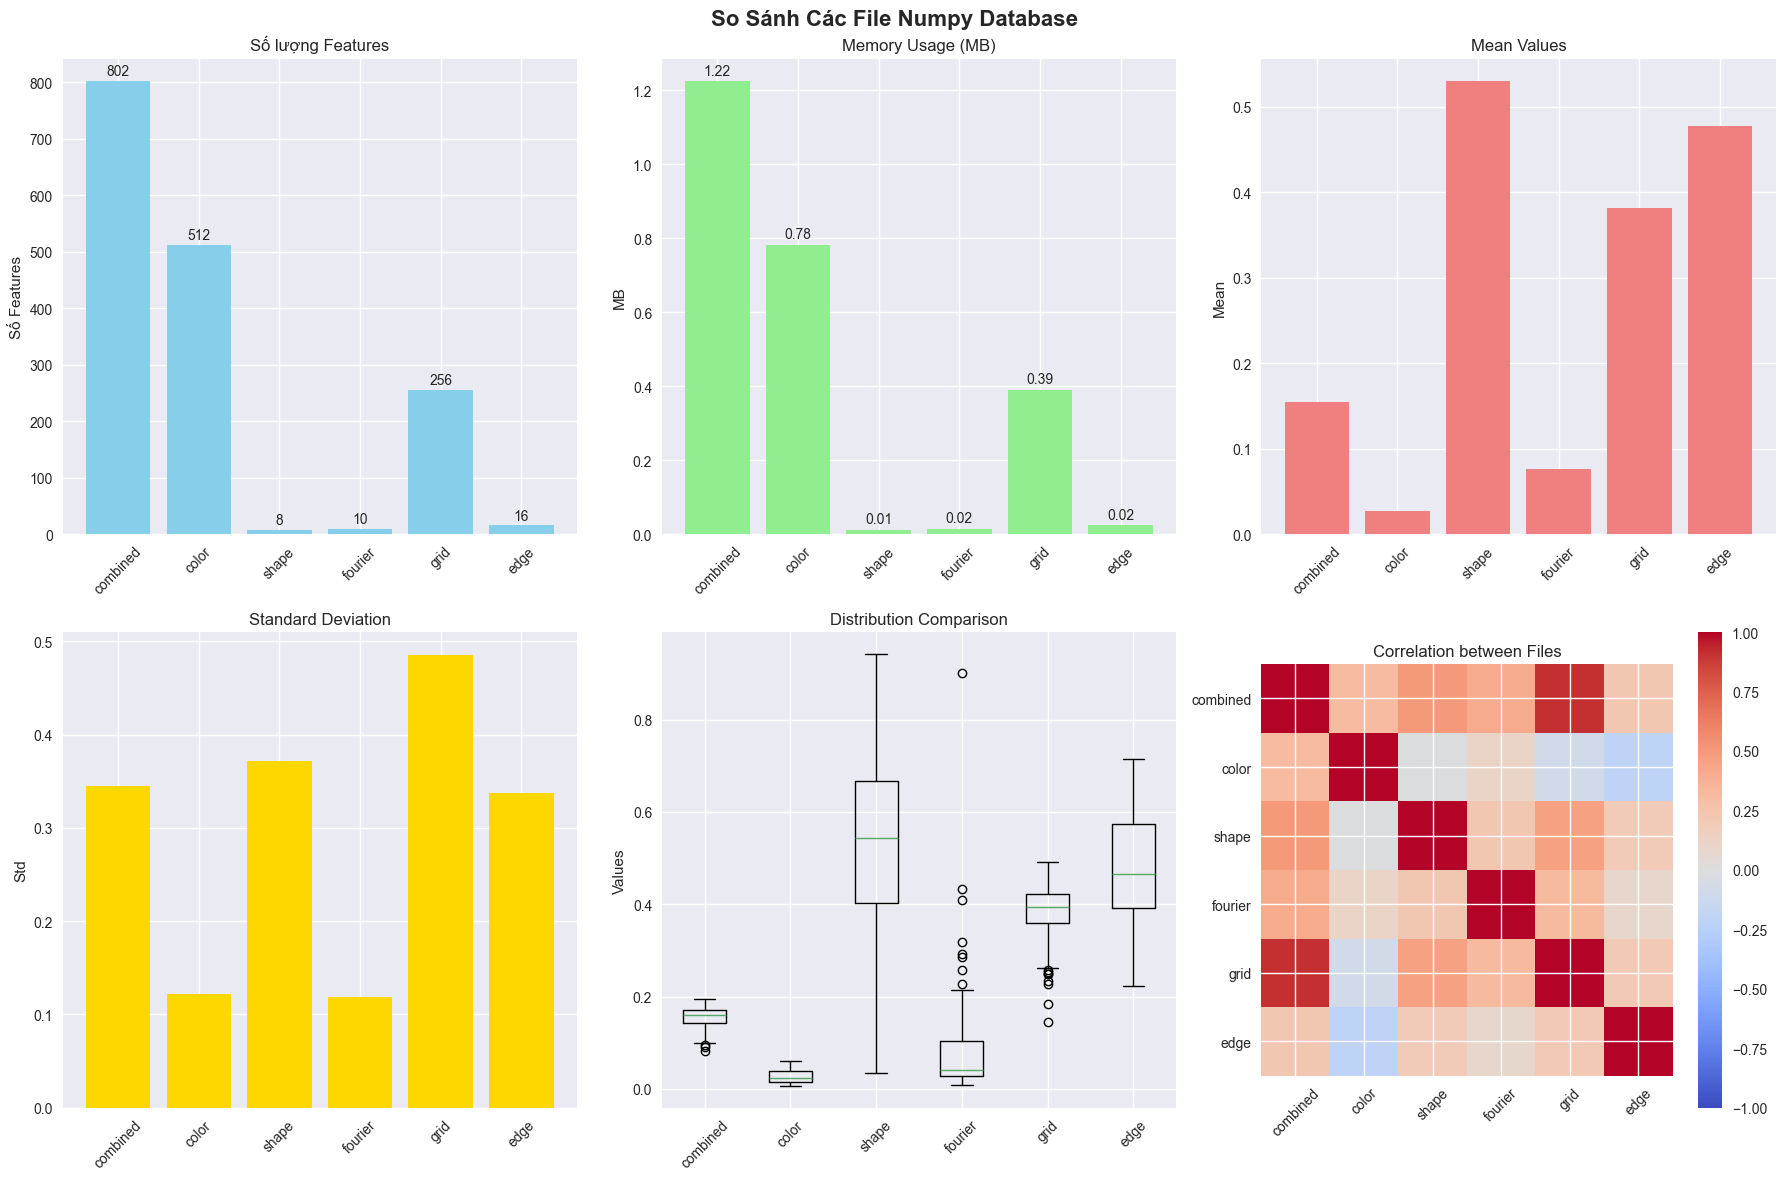

📊 BẢNG SO SÁNH CHI TIẾT:


,File,Samples,Features,Mean,Std,Min,Max,Memory_MB
0,combined,200,802,0.1549,0.3447,0.0,1.0,1.2238
1,color,200,512,0.0273,0.1215,0.0,1.0,0.7812
2,shape,200,8,0.5299,0.3713,0.0,1.0,0.0122
3,fourier,200,10,0.0759,0.1192,0.0,1.0,0.0153
4,grid,200,256,0.3813,0.4857,0.0,1.0,0.3906
5,edge,200,16,0.4772,0.3369,0.0,1.0,0.0244


In [6]:
def compare_numpy_files():
    """So sánh các file numpy với nhau"""
    
    # Load tất cả dữ liệu
    data_dict = {}
    stats_data = []
    
    for filename in numpy_files:
        if os.path.exists(filename):
            try:
                data = np.load(filename)
                data_dict[filename] = data
                
                # Thu thập thống kê
                stats = {
                    'File': filename.replace('.npy', '').replace('db_', ''),
                    'Samples': data.shape[0],
                    'Features': data.shape[1] if len(data.shape) > 1 else 1,
                    'Mean': data.mean(),
                    'Std': data.std(),
                    'Min': data.min(),
                    'Max': data.max(),
                    'Memory_MB': data.nbytes / (1024*1024)
                }
                stats_data.append(stats)
            except Exception as e:
                print(f"❌ Lỗi khi load {filename}: {e}")
    
    if not stats_data:
        print("❌ Không có dữ liệu để so sánh!")
        return
    
    # Tạo DataFrame cho so sánh
    comparison_df = pd.DataFrame(stats_data)
    
    # Vẽ biểu đồ so sánh
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('So Sánh Các File Numpy Database', fontsize=16, fontweight='bold')
    
    # 1. So sánh số lượng features
    ax1 = axes[0, 0]
    bars1 = ax1.bar(comparison_df['File'], comparison_df['Features'], color='skyblue')
    ax1.set_title('Số lượng Features')
    ax1.set_ylabel('Số Features')
    ax1.tick_params(axis='x', rotation=45)
    # Thêm số liệu lên các thanh
    for bar, value in zip(bars1, comparison_df['Features']):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5, 
                str(value), ha='center', va='bottom')
    
    # 2. So sánh Memory usage
    ax2 = axes[0, 1]
    bars2 = ax2.bar(comparison_df['File'], comparison_df['Memory_MB'], color='lightgreen')
    ax2.set_title('Memory Usage (MB)')
    ax2.set_ylabel('MB')
    ax2.tick_params(axis='x', rotation=45)
    for bar, value in zip(bars2, comparison_df['Memory_MB']):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                f'{value:.2f}', ha='center', va='bottom')
    
    # 3. So sánh Mean values
    ax3 = axes[0, 2]
    bars3 = ax3.bar(comparison_df['File'], comparison_df['Mean'], color='lightcoral')
    ax3.set_title('Mean Values')
    ax3.set_ylabel('Mean')
    ax3.tick_params(axis='x', rotation=45)
    
    # 4. So sánh Std values
    ax4 = axes[1, 0]
    bars4 = ax4.bar(comparison_df['File'], comparison_df['Std'], color='gold')
    ax4.set_title('Standard Deviation')
    ax4.set_ylabel('Std')
    ax4.tick_params(axis='x', rotation=45)
    
    # 5. Boxplot so sánh distribution
    ax5 = axes[1, 1]
    # Lấy sample từ mỗi file để so sánh distribution
    sample_data = []
    labels = []
    for filename, data in data_dict.items():
        if len(data.shape) > 1:
            # Lấy mean của mỗi sample
            sample_means = np.mean(data, axis=1)
        else:
            sample_means = data
        sample_data.append(sample_means)
        labels.append(filename.replace('.npy', '').replace('db_', ''))
    
    ax5.boxplot(sample_data, labels=labels)
    ax5.set_title('Distribution Comparison')
    ax5.set_ylabel('Values')
    ax5.tick_params(axis='x', rotation=45)
    
    # 6. Heatmap correlation giữa mean values của các file
    ax6 = axes[1, 2]
    if len(data_dict) > 1:
        # Tạo ma trận correlation giữa mean của từng file
        correlation_data = []
        file_names = list(data_dict.keys())
        
        for fname in file_names:
            data = data_dict[fname]
            if len(data.shape) > 1:
                correlation_data.append(np.mean(data, axis=1))
            else:
                correlation_data.append(data)
        
        correlation_matrix = np.corrcoef(correlation_data)
        im = ax6.imshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
        ax6.set_title('Correlation between Files')
        ax6.set_xticks(range(len(file_names)))
        ax6.set_yticks(range(len(file_names)))
        ax6.set_xticklabels([f.replace('.npy', '').replace('db_', '') for f in file_names], rotation=45)
        ax6.set_yticklabels([f.replace('.npy', '').replace('db_', '') for f in file_names])
        plt.colorbar(im, ax=ax6)
    else:
        ax6.text(0.5, 0.5, 'Cần ít nhất 2 file\nđể tính correlation', 
                ha='center', va='center', transform=ax6.transAxes)
        ax6.set_title('File Correlation')
    
    plt.tight_layout()
    plt.show()
    
    # Hiển thị bảng so sánh
    print("📊 BẢNG SO SÁNH CHI TIẾT:")
    print("=" * 80)
    display(comparison_df.round(4))
    
    return comparison_df

# Chạy so sánh
comparison_result = compare_numpy_files()

## 6. Tương Tác - Chọn File Để Xem Chi Tiết

Phần tương tác để người dùng có thể chọn file cụ thể và xem phân tích chi tiết.

In [7]:
def interactive_file_selector():
    """Giao diện tương tác để chọn file"""
    
    # Kiểm tra file nào tồn tại
    available_files = [f for f in numpy_files if os.path.exists(f)]
    
    if not available_files:
        print("❌ Không có file numpy nào tồn tại!")
        return
    
    print("🎯 CHỌN FILE ĐỂ XEM CHI TIẾT")
    print("=" * 50)
    
    # Hiển thị danh sách file
    for i, filename in enumerate(available_files, 1):
        size_mb = os.path.getsize(filename) / (1024*1024)
        desc = feature_descriptions.get(filename, "Không có mô tả")
        print(f"{i}. {filename} ({size_mb:.2f} MB)")
        print(f"   📝 {desc}")
    
    print(f"\n0. Thoát")
    
    while True:
        try:
            choice = input(f"\nNhập số từ 0-{len(available_files)} để chọn file: ").strip()
            
            if choice == '0':
                print("👋 Tạm biệt!")
                break
            elif choice == '':
                print("⚠️  Vui lòng nhập một số!")
                continue
                
            choice_idx = int(choice) - 1
            
            if 0 <= choice_idx < len(available_files):
                selected_file = available_files[choice_idx]
                print(f"\n🔍 Đã chọn: {selected_file}")
                print("-" * 50)
                
                # Phân tích file được chọn
                data = view_detailed_numpy_file(selected_file, show_plots=True)
                
                # Hỏi có muốn tiếp tục không
                continue_choice = input("\n📋 Bạn có muốn chọn file khác không? (y/n): ").strip().lower()
                if continue_choice not in ['y', 'yes', 'có']:
                    print("👋 Hoàn thành!")
                    break
                    
            else:
                print(f"⚠️  Số không hợp lệ! Vui lòng nhập từ 0-{len(available_files)}")
                
        except ValueError:
            print("⚠️  Vui lòng nhập một số hợp lệ!")
        except KeyboardInterrupt:
            print("\n👋 Đã dừng!")
            break
        except Exception as e:
            print(f"❌ Lỗi: {e}")

# Hàm để phân tích nhanh tất cả files
def quick_analysis_all_files():
    """Phân tích nhanh tất cả files"""
    
    print("⚡ PHÂN TÍCH NHANH TẤT CẢ FILES")
    print("=" * 50)
    
    for filename in numpy_files:
        if os.path.exists(filename):
            print(f"\n📁 {filename}")
            try:
                data = np.load(filename)
                print(f"   📏 Shape: {data.shape}")
                print(f"   📊 Stats: min={data.min():.4f}, max={data.max():.4f}, mean={data.mean():.4f}")
                print(f"   💾 Size: {data.nbytes/(1024*1024):.2f} MB")
            except Exception as e:
                print(f"   ❌ Lỗi: {e}")
        else:
            print(f"\n❌ {filename} - File không tồn tại")

# Chạy phân tích nhanh
quick_analysis_all_files()

⚡ PHÂN TÍCH NHANH TẤT CẢ FILES

📁 db_combined.npy
   📏 Shape: (200, 802)
   📊 Stats: min=0.0000, max=1.0000, mean=0.1549
   💾 Size: 1.22 MB

📁 db_color.npy
   📏 Shape: (200, 512)
   📊 Stats: min=0.0000, max=1.0000, mean=0.0273
   💾 Size: 0.78 MB

📁 db_shape.npy
   📏 Shape: (200, 8)
   📊 Stats: min=0.0000, max=1.0000, mean=0.5299
   💾 Size: 0.01 MB

📁 db_fourier.npy
   📏 Shape: (200, 10)
   📊 Stats: min=0.0000, max=1.0000, mean=0.0759
   💾 Size: 0.02 MB

📁 db_grid.npy
   📏 Shape: (200, 256)
   📊 Stats: min=0.0000, max=1.0000, mean=0.3813
   💾 Size: 0.39 MB

📁 db_edge.npy
   📏 Shape: (200, 16)
   📊 Stats: min=0.0000, max=1.0000, mean=0.4772
   💾 Size: 0.02 MB


In [ ]:
# 🎮 CHẠY GIAO DIỆN TƯƠNG TÁC
# Uncomment dòng dưới để chạy giao diện tương tác chọn file
# interactive_file_selector()

print("💡 HƯỚNG DẪN SỬ DỤNG:")
print("=" * 50)
print("1. Chạy cell trên để xem tổng quan tất cả files")
print("2. Uncomment và chạy interactive_file_selector() để chọn file cụ thể")
print("3. Hoặc gọi trực tiếp: view_detailed_numpy_file('tên_file.npy')")
print("4. Ví dụ: view_detailed_numpy_file('db_color.npy')")

print("\n📝 CÁC LỆNH HỮU ÍCH:")
print("- view_detailed_numpy_file('db_shape.npy')   # Xem chi tiết file shape")
print("- view_detailed_numpy_file('db_fourier.npy') # Xem chi tiết file fourier") 
print("- analyze_numpy_files()                      # Phân tích tổng quan")
print("- compare_numpy_files()                      # So sánh các files")
print("- analyze_pickle_files()                     # Xem thông tin pickle files")

## 7. Kết Luận và Tóm Tắt

### 📊 **Tóm tắt cấu trúc Database:**

Từ phân tích trên, chúng ta có thể thấy:

1. **`db_combined.npy`** (200 × 802): 
   - Là database chính chứa tất cả đặc trưng đã được chuẩn hóa
   - Kết hợp: 512 (color) + 8 (shape) + 10 (fourier) + 256 (grid) + 16 (edge) = 802 features

2. **`db_color.npy`** (200 × 512):
   - Histogram màu HSV với 8×8×8 = 512 bins
   - Giá trị đã chuẩn hóa trong khoảng [0, 1]

3. **`db_shape.npy`** (200 × 8):
   - 1 Eccentricity + 7 Hu moments
   - Mô tả hình dạng đối tượng

4. **`db_fourier.npy`** (200 × 10):
   - 10 hệ số Fourier descriptors
   - Mô tả đường viền đối tượng

5. **`db_grid.npy`** (200 × 256):
   - Grid code 16×16 = 256 cells
   - Giá trị binary (0 hoặc 1)

6. **`db_edge.npy`** (200 × 16):
   - Edge histogram từ lưới 4×4 = 16 cells
   - Mô tả đặc trưng cạnh

### 🎯 **Ứng dụng:**
- Database này được sử dụng cho hệ thống tìm kiếm ảnh tương tự
- Hỗ trợ nhiều loại đặc trưng khác nhau: màu sắc, hình dạng, texture, v.v.
- Cho phép tìm kiếm theo từng loại đặc trưng riêng biệt hoặc kết hợp

### 💡 **Lưu ý:**
- Tất cả dữ liệu đã được chuẩn hóa bằng MinMaxScaler
- Database chứa 200 ảnh mẫu từ dataset trái cây
- Các file pickle chứa thông tin bổ trợ (đường dẫn, chỉ số, scaler)

## 8. Sơ Đồ Liên Kết và Quy Trình Tìm Kiếm

Visualize mối quan hệ giữa các file numpy, pickle và quy trình tìm kiếm ảnh tương tự.

🎨 VẼ SƠ ĐỒ KIẾN TRÚC DATABASE VÀ QUY TRÌNH TÌM KIẾM


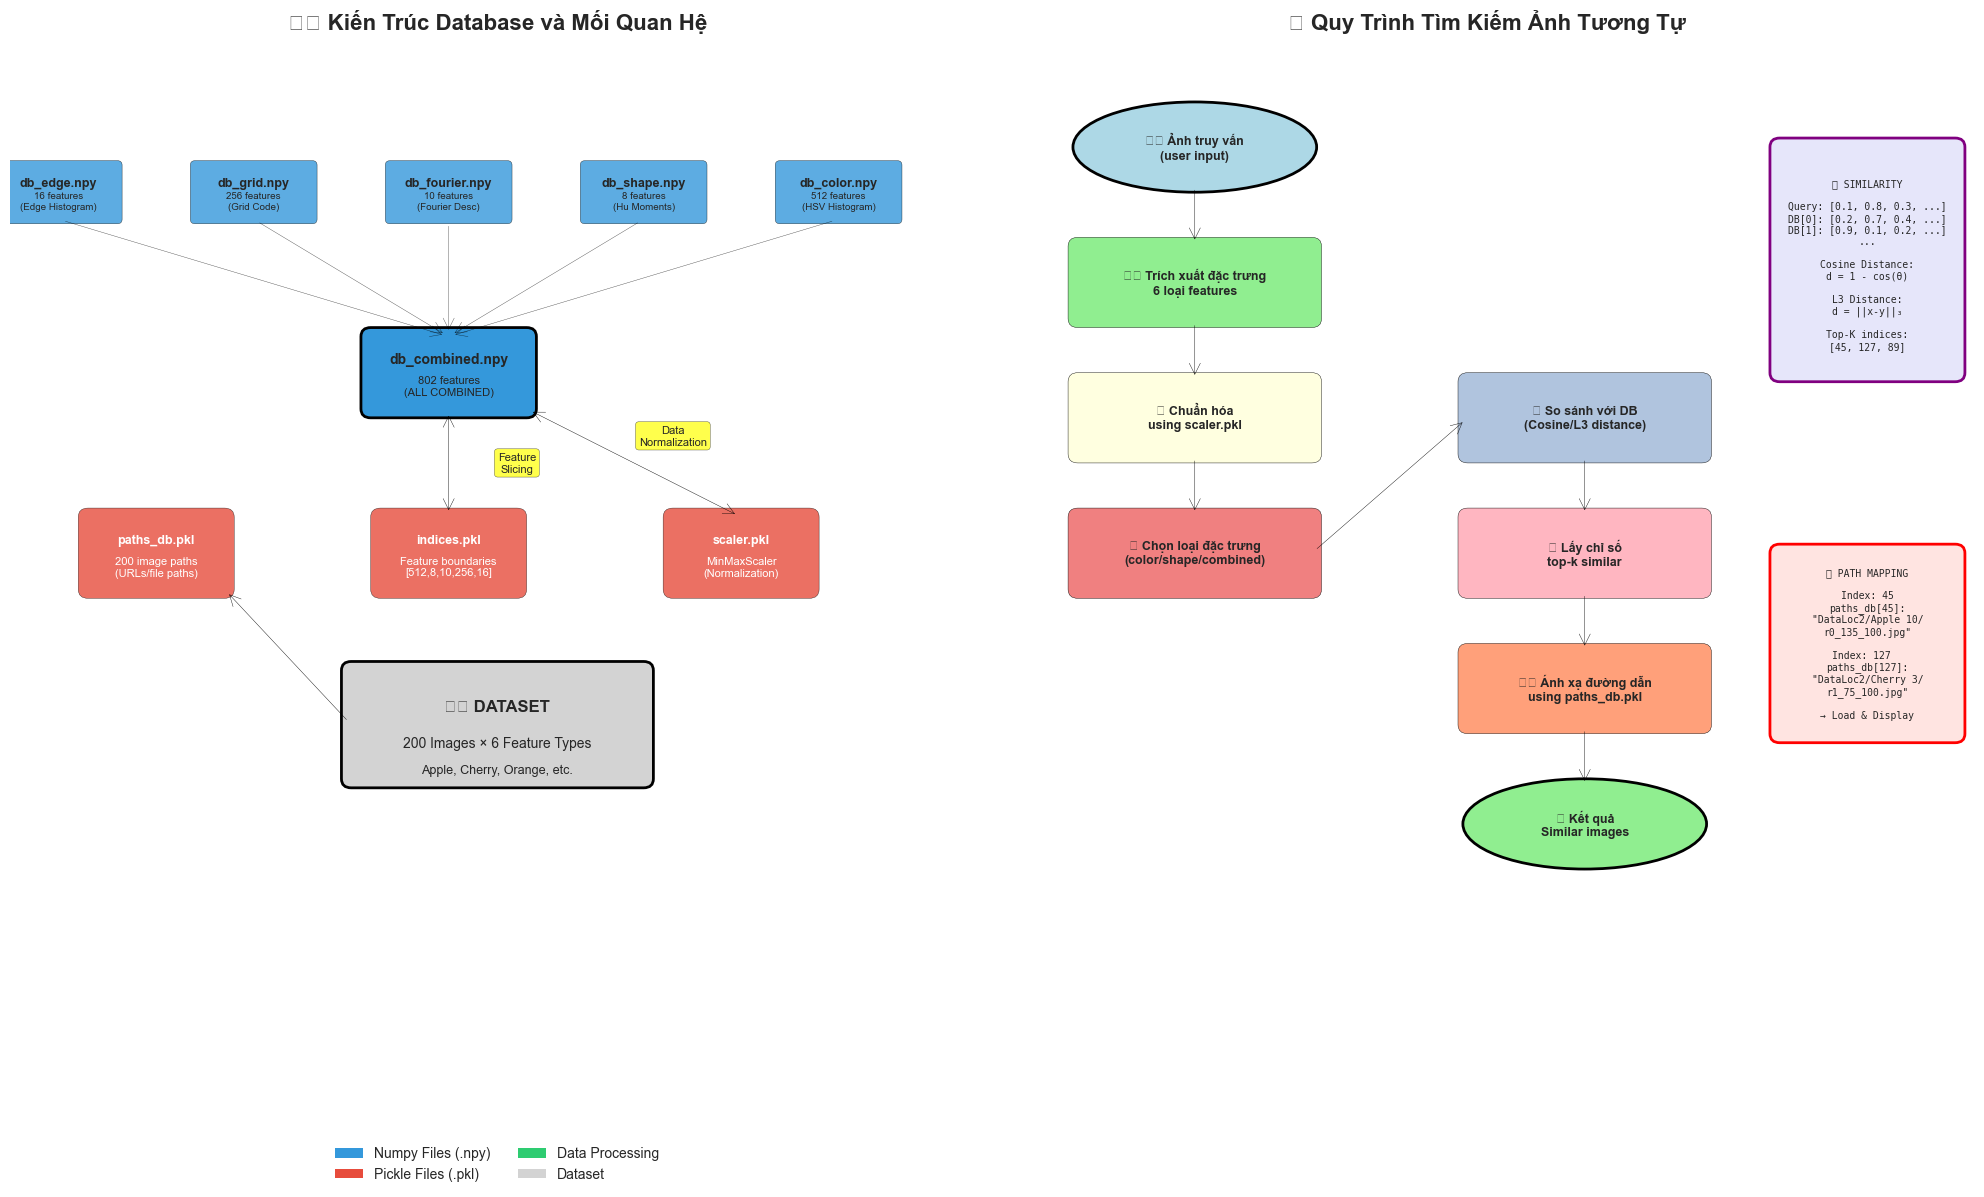


🎨 VẼ SƠ ĐỒ CHI TIẾT DATA FLOW


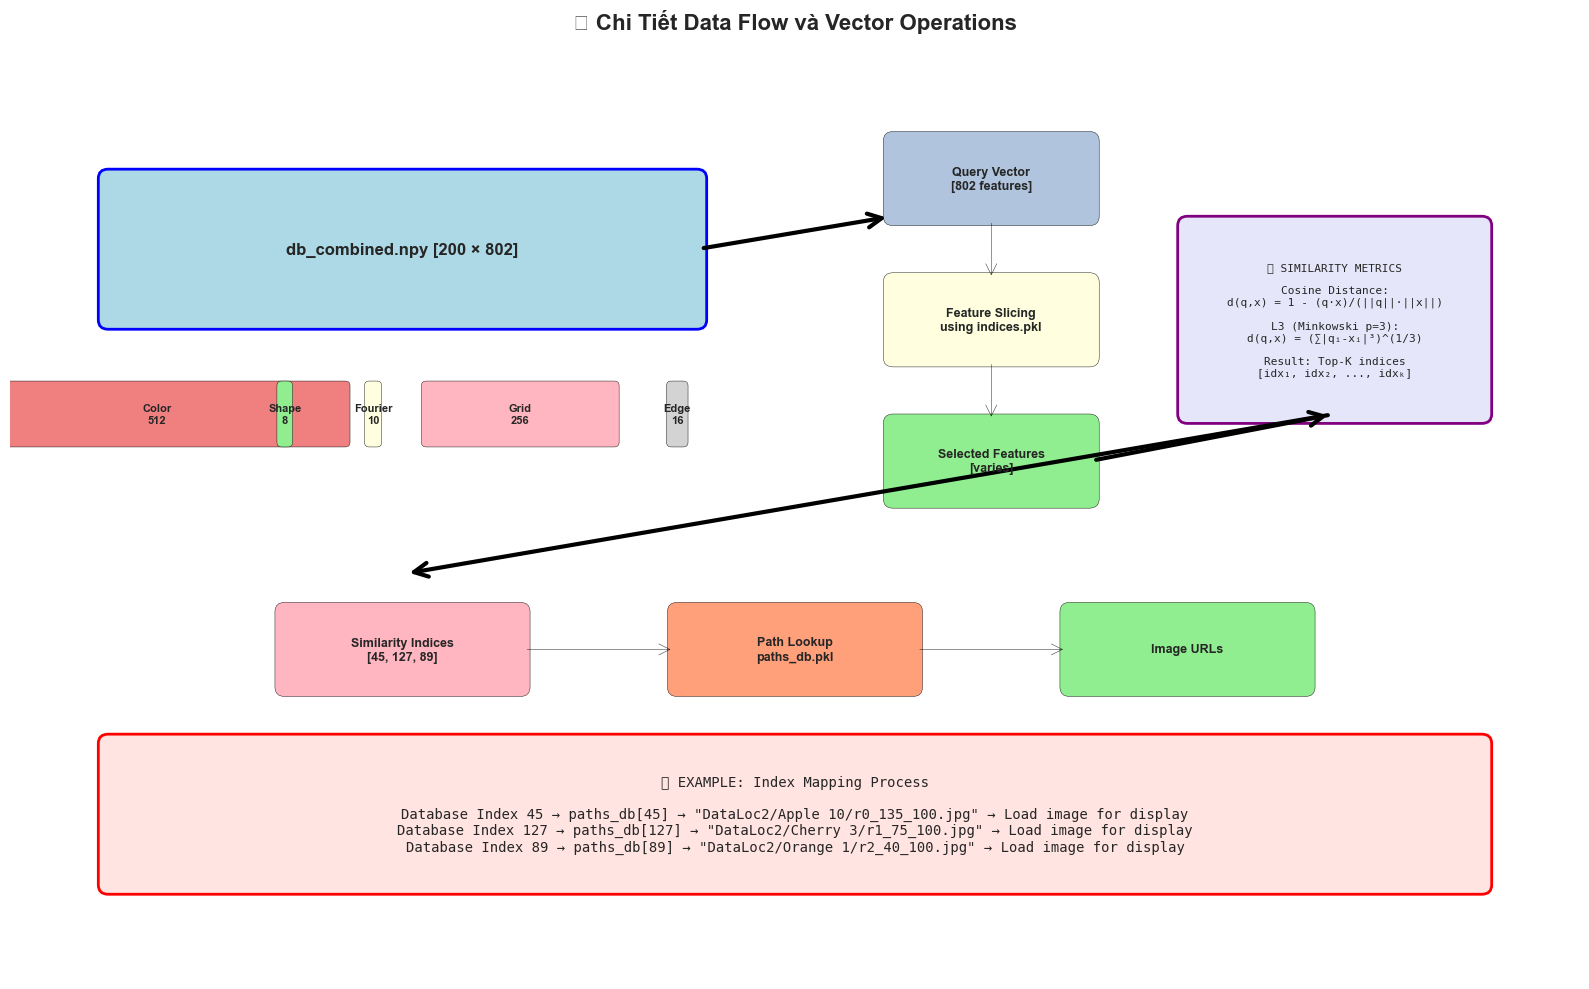

In [8]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, ConnectionPatch
import numpy as np

def draw_database_architecture():
    """Vẽ sơ đồ kiến trúc database và quy trình tìm kiếm"""
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 12))
    
    # === SƠ ĐỒ 1: KIẾN TRÚC DATABASE ===
    ax1.set_xlim(0, 10)
    ax1.set_ylim(0, 12)
    ax1.set_title('🏗️ Kiến Trúc Database và Mối Quan Hệ', fontsize=16, fontweight='bold', pad=20)
    ax1.axis('off')
    
    # Màu sắc cho các thành phần
    colors = {
        'numpy': '#3498db',      # Xanh dương
        'pickle': '#e74c3c',     # Đỏ
        'process': '#2ecc71',    # Xanh lá
        'result': '#f39c12'      # Cam
    }
    
    # === NUMPY FILES ===
    numpy_files_info = [
        ('db_color.npy', '512 features\n(HSV Histogram)', 8.5, 10.5),
        ('db_shape.npy', '8 features\n(Hu Moments)', 6.5, 10.5),
        ('db_fourier.npy', '10 features\n(Fourier Desc)', 4.5, 10.5),
        ('db_grid.npy', '256 features\n(Grid Code)', 2.5, 10.5),
        ('db_edge.npy', '16 features\n(Edge Histogram)', 0.5, 10.5),
        ('db_combined.npy', '802 features\n(ALL COMBINED)', 4.5, 8.5)
    ]
    
    # Vẽ numpy files
    for filename, desc, x, y in numpy_files_info:
        if filename == 'db_combined.npy':
            # File chính - kích thước lớn hơn
            box = FancyBboxPatch((x-0.8, y-0.4), 1.6, 0.8, 
                               boxstyle="round,pad=0.1", 
                               facecolor=colors['numpy'], 
                               edgecolor='black', linewidth=2)
            ax1.add_patch(box)
            ax1.text(x, y+0.15, filename, ha='center', va='center', fontweight='bold', fontsize=10)
            ax1.text(x, y-0.15, desc, ha='center', va='center', fontsize=8)
        else:
            # Files thành phần
            box = FancyBboxPatch((x-0.6, y-0.3), 1.2, 0.6, 
                               boxstyle="round,pad=0.05", 
                               facecolor=colors['numpy'], 
                               edgecolor='black', alpha=0.8)
            ax1.add_patch(box)
            ax1.text(x, y+0.1, filename, ha='center', va='center', fontweight='bold', fontsize=9)
            ax1.text(x, y-0.1, desc, ha='center', va='center', fontsize=7)
    
    # Vẽ mũi tên từ các file thành phần đến combined
    for filename, desc, x, y in numpy_files_info[:-1]:  # Bỏ combined file
        arrow = ConnectionPatch((x, y-0.3), (4.5, 8.9), "data", "data",
                              arrowstyle="->", shrinkA=5, shrinkB=5, 
                              mutation_scale=20, fc=colors['process'], alpha=0.7)
        ax1.add_patch(arrow)
    
    # === PICKLE FILES ===
    pickle_files_info = [
        ('paths_db.pkl', '200 image paths\n(URLs/file paths)', 1.5, 6.5),
        ('indices.pkl', 'Feature boundaries\n[512,8,10,256,16]', 4.5, 6.5),
        ('scaler.pkl', 'MinMaxScaler\n(Normalization)', 7.5, 6.5)
    ]
    
    for filename, desc, x, y in pickle_files_info:
        box = FancyBboxPatch((x-0.7, y-0.4), 1.4, 0.8, 
                           boxstyle="round,pad=0.1", 
                           facecolor=colors['pickle'], 
                           edgecolor='black', alpha=0.8)
        ax1.add_patch(box)
        ax1.text(x, y+0.15, filename, ha='center', va='center', fontweight='bold', fontsize=9, color='white')
        ax1.text(x, y-0.15, desc, ha='center', va='center', fontsize=8, color='white')
    
    # === MỐI QUAN HỆ ===
    # indices.pkl -> combined
    arrow1 = ConnectionPatch((4.5, 6.9), (4.5, 8.1), "data", "data",
                           arrowstyle="<->", shrinkA=5, shrinkB=5, 
                           mutation_scale=20, fc=colors['process'])
    ax1.add_patch(arrow1)
    ax1.text(5.2, 7.5, 'Feature\nSlicing', ha='center', va='center', fontsize=8, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))
    
    # scaler.pkl -> combined
    arrow2 = ConnectionPatch((7.5, 6.9), (5.3, 8.1), "data", "data",
                           arrowstyle="<->", shrinkA=5, shrinkB=5, 
                           mutation_scale=20, fc=colors['process'])
    ax1.add_patch(arrow2)
    ax1.text(6.8, 7.8, 'Data\nNormalization', ha='center', va='center', fontsize=8,
             bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))
    
    # === DATASET ===
    dataset_box = FancyBboxPatch((3.5, 4), 3, 1.2, 
                               boxstyle="round,pad=0.1", 
                               facecolor='lightgray', 
                               edgecolor='black', linewidth=2)
    ax1.add_patch(dataset_box)
    ax1.text(5, 4.8, '🗃️ DATASET', ha='center', va='center', fontweight='bold', fontsize=12)
    ax1.text(5, 4.4, '200 Images × 6 Feature Types', ha='center', va='center', fontsize=10)
    ax1.text(5, 4.1, 'Apple, Cherry, Orange, etc.', ha='center', va='center', fontsize=9)
    
    # Mũi tên từ dataset đến paths
    arrow3 = ConnectionPatch((3.5, 4.6), (2.2, 6.1), "data", "data",
                           arrowstyle="->", shrinkA=5, shrinkB=5, 
                           mutation_scale=20, fc='gray')
    ax1.add_patch(arrow3)
    
    # === LEGEND ===
    legend_elements = [
        plt.Rectangle((0, 0), 1, 1, facecolor=colors['numpy'], label='Numpy Files (.npy)'),
        plt.Rectangle((0, 0), 1, 1, facecolor=colors['pickle'], label='Pickle Files (.pkl)'),
        plt.Rectangle((0, 0), 1, 1, facecolor=colors['process'], label='Data Processing'),
        plt.Rectangle((0, 0), 1, 1, facecolor='lightgray', label='Dataset')
    ]
    ax1.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    
    # === SƠ ĐỒ 2: QUY TRÌNH TÌM KIẾM ===
    ax2.set_xlim(0, 10)
    ax2.set_ylim(0, 12)
    ax2.set_title('🔍 Quy Trình Tìm Kiếm Ảnh Tương Tự', fontsize=16, fontweight='bold', pad=20)
    ax2.axis('off')
    
    # Các bước trong quy trình
    steps = [
        ('Query Image', '🖼️ Ảnh truy vấn\n(user input)', 2, 11, 'lightblue'),
        ('Feature Extraction', '⚙️ Trích xuất đặc trưng\n6 loại features', 2, 9.5, 'lightgreen'),
        ('Normalization', '📊 Chuẩn hóa\nusing scaler.pkl', 2, 8, 'lightyellow'),
        ('Feature Selection', '🎯 Chọn loại đặc trưng\n(color/shape/combined)', 2, 6.5, 'lightcoral'),
        ('Database Lookup', '🔎 So sánh với DB\n(Cosine/L3 distance)', 6, 8, 'lightsteelblue'),
        ('Get Indices', '📍 Lấy chỉ số\ntop-k similar', 6, 6.5, 'lightpink'),
        ('Path Mapping', '🗂️ Ánh xạ đường dẫn\nusing paths_db.pkl', 6, 5, 'lightsalmon'),
        ('Result Images', '🎉 Kết quả\nSimilar images', 6, 3.5, 'lightgreen')
    ]
    
    # Vẽ các bước
    for step_name, desc, x, y, color in steps:
        if step_name in ['Query Image', 'Result Images']:
            # Bước đầu và cuối - hình oval
            box = patches.Ellipse((x, y), 2.5, 1, facecolor=color, edgecolor='black', linewidth=2)
            ax2.add_patch(box)
        else:
            # Các bước xử lý - hình chữ nhật
            box = FancyBboxPatch((x-1.2, y-0.4), 2.4, 0.8, 
                               boxstyle="round,pad=0.1", 
                               facecolor=color, 
                               edgecolor='black')
            ax2.add_patch(box)
        
        ax2.text(x, y, desc, ha='center', va='center', fontweight='bold', fontsize=9)
    
    # Vẽ mũi tên giữa các bước
    arrows = [
        ((2, 10.6), (2, 9.9)),      # Query -> Feature Extraction
        ((2, 9.1), (2, 8.4)),       # Feature Extraction -> Normalization
        ((2, 7.6), (2, 6.9)),       # Normalization -> Feature Selection
        ((3.2, 6.5), (4.8, 8)),     # Feature Selection -> Database Lookup
        ((6, 7.6), (6, 6.9)),       # Database Lookup -> Get Indices
        ((6, 6.1), (6, 5.4)),       # Get Indices -> Path Mapping
        ((6, 4.6), (6, 3.9))        # Path Mapping -> Result Images
    ]
    
    for start, end in arrows:
        arrow = ConnectionPatch(start, end, "data", "data",
                              arrowstyle="->", shrinkA=5, shrinkB=5, 
                              mutation_scale=20, fc='darkblue')
        ax2.add_patch(arrow)
    
    # === CHI TIẾT VECTOR SIMILARITY ===
    # Thêm hộp giải thích về similarity
    similarity_box = FancyBboxPatch((8, 8.5), 1.8, 2.5, 
                                  boxstyle="round,pad=0.1", 
                                  facecolor='lavender', 
                                  edgecolor='purple', linewidth=2)
    ax2.add_patch(similarity_box)
    
    similarity_text = """🧮 SIMILARITY
    
Query: [0.1, 0.8, 0.3, ...]
DB[0]: [0.2, 0.7, 0.4, ...]
DB[1]: [0.9, 0.1, 0.2, ...]
...

Cosine Distance:
d = 1 - cos(θ)

L3 Distance:
d = ||x-y||₃

Top-K indices:
[45, 127, 89]"""
    
    ax2.text(8.9, 9.7, similarity_text, ha='center', va='center', fontsize=7, 
             family='monospace')
    
    # === MAPPING EXAMPLE ===
    mapping_box = FancyBboxPatch((8, 4.5), 1.8, 2, 
                                boxstyle="round,pad=0.1", 
                                facecolor='mistyrose', 
                                edgecolor='red', linewidth=2)
    ax2.add_patch(mapping_box)
    
    mapping_text = """📂 PATH MAPPING

Index: 45
paths_db[45]:
"DataLoc2/Apple 10/
r0_135_100.jpg"

Index: 127  
paths_db[127]:
"DataLoc2/Cherry 3/
r1_75_100.jpg"

→ Load & Display"""
    
    ax2.text(8.9, 5.5, mapping_text, ha='center', va='center', fontsize=7, 
             family='monospace')
    
    plt.tight_layout()
    plt.show()

def create_detailed_flow_diagram():
    """Tạo sơ đồ chi tiết về data flow"""
    
    fig, ax = plt.subplots(1, 1, figsize=(16, 10))
    ax.set_xlim(0, 16)
    ax.set_ylim(0, 10)
    ax.set_title('📊 Chi Tiết Data Flow và Vector Operations', fontsize=16, fontweight='bold')
    ax.axis('off')
    
    # === DATABASE STRUCTURE ===
    # Combined database
    combined_rect = FancyBboxPatch((1, 7), 6, 1.5, 
                                 boxstyle="round,pad=0.1", 
                                 facecolor='lightblue', 
                                 edgecolor='blue', linewidth=2)
    ax.add_patch(combined_rect)
    ax.text(4, 7.75, 'db_combined.npy [200 × 802]', ha='center', va='center', 
           fontweight='bold', fontsize=12)
    
    # Feature breakdown
    feature_parts = [
        ('Color\n512', 1.5, 6, 'lightcoral'),
        ('Shape\n8', 2.8, 6, 'lightgreen'), 
        ('Fourier\n10', 3.7, 6, 'lightyellow'),
        ('Grid\n256', 5.2, 6, 'lightpink'),
        ('Edge\n16', 6.8, 6, 'lightgray')
    ]
    
    for name, x, y, color in feature_parts:
        width = float(name.split('\n')[1]) / 802 * 6  # Proportional width
        rect = FancyBboxPatch((x-width/2, y-0.3), width, 0.6, 
                            boxstyle="round,pad=0.05", 
                            facecolor=color, 
                            edgecolor='black')
        ax.add_patch(rect)
        ax.text(x, y, name, ha='center', va='center', fontsize=8, fontweight='bold')
    
    # === QUERY PROCESSING ===
    query_steps = [
        ('Query Vector\n[802 features]', 10, 8.5, 'lightsteelblue'),
        ('Feature Slicing\nusing indices.pkl', 10, 7, 'lightyellow'),
        ('Selected Features\n[varies]', 10, 5.5, 'lightgreen')
    ]
    
    for desc, x, y, color in query_steps:
        rect = FancyBboxPatch((x-1, y-0.4), 2, 0.8, 
                            boxstyle="round,pad=0.1", 
                            facecolor=color, 
                            edgecolor='black')
        ax.add_patch(rect)
        ax.text(x, y, desc, ha='center', va='center', fontsize=9, fontweight='bold')
    
    # Arrows between query steps
    for i in range(len(query_steps)-1):
        start_y = query_steps[i][2] - 0.4
        end_y = query_steps[i+1][2] + 0.4
        arrow = ConnectionPatch((10, start_y), (10, end_y), "data", "data",
                              arrowstyle="->", shrinkA=5, shrinkB=5, 
                              mutation_scale=20, fc='blue')
        ax.add_patch(arrow)
    
    # === SIMILARITY COMPUTATION ===
    similarity_rect = FancyBboxPatch((12, 6), 3, 2, 
                                   boxstyle="round,pad=0.1", 
                                   facecolor='lavender', 
                                   edgecolor='purple', linewidth=2)
    ax.add_patch(similarity_rect)
    
    similarity_text = """🧮 SIMILARITY METRICS

Cosine Distance:
d(q,x) = 1 - (q·x)/(||q||·||x||)

L3 (Minkowski p=3):
d(q,x) = (∑|qᵢ-xᵢ|³)^(1/3)

Result: Top-K indices
[idx₁, idx₂, ..., idxₖ]"""
    
    ax.text(13.5, 7, similarity_text, ha='center', va='center', fontsize=8, 
           family='monospace')
    
    # === RESULT MAPPING ===
    result_steps = [
        ('Similarity Indices\n[45, 127, 89]', 4, 3.5, 'lightpink'),
        ('Path Lookup\npaths_db.pkl', 8, 3.5, 'lightsalmon'),
        ('Image URLs', 12, 3.5, 'lightgreen')
    ]
    
    for desc, x, y, color in result_steps:
        rect = FancyBboxPatch((x-1.2, y-0.4), 2.4, 0.8, 
                            boxstyle="round,pad=0.1", 
                            facecolor=color, 
                            edgecolor='black')
        ax.add_patch(rect)
        ax.text(x, y, desc, ha='center', va='center', fontsize=9, fontweight='bold')
    
    # Arrows between result steps
    arrow1 = ConnectionPatch((5.2, 3.5), (6.8, 3.5), "data", "data",
                           arrowstyle="->", shrinkA=5, shrinkB=5, 
                           mutation_scale=20, fc='green')
    ax.add_patch(arrow1)
    
    arrow2 = ConnectionPatch((9.2, 3.5), (10.8, 3.5), "data", "data",
                           arrowstyle="->", shrinkA=5, shrinkB=5, 
                           mutation_scale=20, fc='green')
    ax.add_patch(arrow2)
    
    # === INDEX MAPPING EXAMPLE ===
    example_rect = FancyBboxPatch((1, 1), 14, 1.5, 
                                boxstyle="round,pad=0.1", 
                                facecolor='mistyrose', 
                                edgecolor='red', linewidth=2)
    ax.add_patch(example_rect)
    
    example_text = """📋 EXAMPLE: Index Mapping Process
    
Database Index 45 → paths_db[45] → "DataLoc2/Apple 10/r0_135_100.jpg" → Load image for display
Database Index 127 → paths_db[127] → "DataLoc2/Cherry 3/r1_75_100.jpg" → Load image for display
Database Index 89 → paths_db[89] → "DataLoc2/Orange 1/r2_40_100.jpg" → Load image for display"""
    
    ax.text(8, 1.75, example_text, ha='center', va='center', fontsize=10, 
           family='monospace')
    
    # Main flow arrows
    main_arrow1 = ConnectionPatch((7, 7.75), (9, 8.1), "data", "data",
                                arrowstyle="->", shrinkA=5, shrinkB=5, 
                                mutation_scale=25, fc='red', linewidth=3)
    ax.add_patch(main_arrow1)
    
    main_arrow2 = ConnectionPatch((11, 5.5), (13.5, 6), "data", "data",
                                arrowstyle="->", shrinkA=5, shrinkB=5, 
                                mutation_scale=25, fc='red', linewidth=3)
    ax.add_patch(main_arrow2)
    
    main_arrow3 = ConnectionPatch((13.5, 6), (4, 4.3), "data", "data",
                                arrowstyle="->", shrinkA=5, shrinkB=5, 
                                mutation_scale=25, fc='red', linewidth=3)
    ax.add_patch(main_arrow3)
    
    plt.tight_layout()
    plt.show()

# Vẽ cả hai sơ đồ
print("🎨 VẼ SƠ ĐỒ KIẾN TRÚC DATABASE VÀ QUY TRÌNH TÌM KIẾM")
print("=" * 60)
draw_database_architecture()

print("\n🎨 VẼ SƠ ĐỒ CHI TIẾT DATA FLOW")
print("=" * 60)
create_detailed_flow_diagram()

In [ ]:
def demonstrate_search_process():
    """Demo thực tế quy trình tìm kiếm với dữ liệu thật"""
    
    print("🔬 DEMO QUY TRÌNH TÌM KIẾM THỰC TẾ")
    print("=" * 60)
    
    # Kiểm tra files tồn tại
    required_files = ['db_combined.npy', 'paths_db.pkl', 'indices.pkl']
    missing_files = [f for f in required_files if not os.path.exists(f)]
    
    if missing_files:
        print(f"❌ Thiếu files: {missing_files}")
        return
    
    try:
        # Load dữ liệu
        print("📂 1. LOADING DATABASE...")
        db_combined = np.load('db_combined.npy')
        with open('paths_db.pkl', 'rb') as f:
            image_paths = pickle.load(f)
        with open('indices.pkl', 'rb') as f:
            indices = pickle.load(f)
        
        print(f"   ✅ Database shape: {db_combined.shape}")
        print(f"   ✅ Number of image paths: {len(image_paths)}")
        print(f"   ✅ Feature indices: {indices}")
        
        # Giả lập query vector (lấy một ảnh từ database làm query)
        print(f"\n🎯 2. QUERY PROCESSING...")
        query_idx = 50  # Lấy ảnh thứ 50 làm query
        query_vector = db_combined[query_idx:query_idx+1]  # Shape (1, 802)
        query_path = image_paths[query_idx]
        
        print(f"   🖼️  Query image: {query_path}")
        print(f"   📊 Query vector shape: {query_vector.shape}")
        print(f"   📈 Query vector stats: min={query_vector.min():.4f}, max={query_vector.max():.4f}")
        
        # Feature slicing demo
        print(f"\n✂️  3. FEATURE SLICING DEMO...")
        feature_names = ['color', 'shape', 'fourier', 'grid', 'edge']
        cumulative_indices = np.cumsum([0] + indices)
        
        for i, name in enumerate(feature_names):
            start_idx = cumulative_indices[i]
            end_idx = cumulative_indices[i+1]
            feature_slice = query_vector[:, start_idx:end_idx]
            print(f"   🔹 {name}: features[{start_idx}:{end_idx}] → shape {feature_slice.shape}")
        
        # Similarity computation
        print(f"\n🧮 4. SIMILARITY COMPUTATION...")
        from sklearn.metrics.pairwise import cosine_distances
        
        # Tính cosine distance
        cosine_dists = cosine_distances(query_vector, db_combined).flatten()
        
        # Tính L3 distance cho một subset (vì tính toán lâu)
        sample_size = min(50, len(db_combined))
        l3_dists = np.array([
            np.sum(np.abs(query_vector[0] - db_combined[i])**3)**(1/3) 
            for i in range(sample_size)
        ])
        
        print(f"   📐 Cosine distances computed for all {len(db_combined)} samples")
        print(f"   📏 L3 distances computed for {sample_size} samples")
        
        # Top-K results
        k = 5
        print(f"\n🏆 5. TOP-{k} SIMILAR IMAGES...")
        
        # Cosine results
        cosine_top_k = np.argsort(cosine_dists)[:k]
        print(f"\n   📐 COSINE DISTANCE RESULTS:")
        for i, idx in enumerate(cosine_top_k, 1):
            distance = cosine_dists[idx]
            path = image_paths[idx]
            print(f"      {i}. Index {idx:3d} | Distance: {distance:.4f} | {path}")
        
        # L3 results (chỉ trong sample)
        l3_top_k = np.argsort(l3_dists)[:k]
        print(f"\n   📏 L3 DISTANCE RESULTS (sample of {sample_size}):")
        for i, idx in enumerate(l3_top_k, 1):
            distance = l3_dists[idx]
            path = image_paths[idx]
            print(f"      {i}. Index {idx:3d} | Distance: {distance:.4f} | {path}")
        
        # Path mapping demonstration
        print(f"\n🗂️  6. PATH MAPPING DEMONSTRATION...")
        print("   📋 Index → Path mapping examples:")
        for i, idx in enumerate(cosine_top_k[:3], 1):
            print(f"      Step {i}: Database[{idx}] → paths_db[{idx}] → '{image_paths[idx]}'")
        
        # Visualize similarity matrix (sample)
        print(f"\n📊 7. SIMILARITY VISUALIZATION...")
        
        # Tạo ma trận similarity cho một sample nhỏ
        sample_indices = cosine_top_k[:10]  # Top 10 similar images
        sample_vectors = db_combined[sample_indices]
        
        # Tính similarity matrix
        similarity_matrix = 1 - cosine_distances(sample_vectors, sample_vectors)
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Heatmap similarity matrix
        im1 = ax1.imshow(similarity_matrix, cmap='coolwarm', vmin=0, vmax=1)
        ax1.set_title('Similarity Matrix (Top 10 Similar Images)')
        ax1.set_xlabel('Image Index')
        ax1.set_ylabel('Image Index')
        
        # Thêm số vào heatmap
        for i in range(len(sample_indices)):
            for j in range(len(sample_indices)):
                ax1.text(j, i, f'{similarity_matrix[i, j]:.2f}', 
                        ha='center', va='center', fontsize=8)
        
        plt.colorbar(im1, ax=ax1)
        
        # Bar chart distances
        ax2.bar(range(len(cosine_top_k)), cosine_dists[cosine_top_k], color='skyblue')
        ax2.set_title(f'Cosine Distances (Top {k} Similar)')
        ax2.set_xlabel('Rank')
        ax2.set_ylabel('Distance')
        ax2.set_xticks(range(len(cosine_top_k)))
        ax2.set_xticklabels([f'#{i+1}' for i in range(len(cosine_top_k))])
        
        # Thêm giá trị lên các thanh
        for i, (idx, dist) in enumerate(zip(cosine_top_k, cosine_dists[cosine_top_k])):
            ax2.text(i, dist + 0.001, f'{dist:.3f}', ha='center', va='bottom', fontsize=9)
        
        plt.tight_layout()
        plt.show()
        
        # Summary
        print(f"\n📋 8. SUMMARY...")
        print(f"   🎯 Query: {query_path}")
        print(f"   🔍 Database size: {db_combined.shape[0]} images × {db_combined.shape[1]} features")
        print(f"   🏆 Found {k} most similar images using cosine distance")
        print(f"   ⚡ Most similar: {image_paths[cosine_top_k[0]]} (distance: {cosine_dists[cosine_top_k[0]]:.4f})")
        
        return {
            'query_idx': query_idx,
            'query_path': query_path,
            'cosine_results': list(zip(cosine_top_k, cosine_dists[cosine_top_k])),
            'l3_results': list(zip(l3_top_k, l3_dists[l3_top_k])) if len(l3_dists) > 0 else []
        }
        
    except Exception as e:
        print(f"❌ Lỗi trong demo: {e}")
        return None

# Chạy demo
demo_results = demonstrate_search_process()

## 📚 Tóm Tắt Sơ Đồ và Quy Trình

### 🏗️ **Kiến Trúc Database:**

1. **6 File Numpy (.npy):**
   - `db_color.npy`: 512 features (HSV histogram)
   - `db_shape.npy`: 8 features (Hu moments) 
   - `db_fourier.npy`: 10 features (Fourier descriptors)
   - `db_grid.npy`: 256 features (Grid code)
   - `db_edge.npy`: 16 features (Edge histogram)
   - `db_combined.npy`: 802 features (tổng hợp tất cả)

2. **3 File Pickle (.pkl):**
   - `paths_db.pkl`: Danh sách 200 đường dẫn ảnh
   - `indices.pkl`: Chỉ số phân chia features [512, 8, 10, 256, 16]
   - `scaler.pkl`: Bộ chuẩn hóa MinMaxScaler

### 🔍 **Quy Trình Tìm Kiếm:**

1. **Input**: Ảnh truy vấn từ người dùng
2. **Feature Extraction**: Trích xuất 6 loại đặc trưng
3. **Normalization**: Chuẩn hóa bằng `scaler.pkl`
4. **Feature Selection**: Chọn loại đặc trưng (color/shape/combined)
5. **Database Lookup**: So sánh với database bằng Cosine/L3 distance
6. **Get Indices**: Lấy top-K ảnh tương tự nhất
7. **Path Mapping**: Sử dụng `paths_db.pkl` để ánh xạ chỉ số → đường dẫn
8. **Result**: Hiển thị ảnh tương tự

### 🧮 **Vector Similarity Process:**

```
Query Vector [802]: [0.1, 0.8, 0.3, ...]
Database[0]  [802]: [0.2, 0.7, 0.4, ...]  → Distance: 0.15
Database[1]  [802]: [0.9, 0.1, 0.2, ...]  → Distance: 0.85
...
Database[199][802]: [0.1, 0.7, 0.3, ...]  → Distance: 0.12

Sorted by distance: [199, 0, 45, 127, ...]
Top-K indices: [199, 0, 45]

Index → Path mapping:
- 199 → paths_db[199] → "DataLoc2/Apple 10/r0_135_100.jpg"
- 0   → paths_db[0]   → "DataLoc2/Apple 10/r0_139_100.jpg"  
- 45  → paths_db[45]  → "DataLoc2/Cherry 3/r1_75_100.jpg"
```

### 🎯 **Ưu điểm của kiến trúc này:**

- **Modular**: Mỗi loại đặc trưng được lưu riêng, dễ bảo trì
- **Flexible**: Có thể tìm kiếm theo từng loại đặc trưng riêng biệt
- **Efficient**: Database đã được tiền xử lý và chuẩn hóa
- **Scalable**: Dễ mở rộng thêm loại đặc trưng mới
- **Fast**: Vector operations được tối ưu bằng numpy